In [1]:
import pygestor

In [2]:
# Show available datasets
dataset_names = pygestor.list_datasets(display = True)

      dataset name       |        modality         |         description          
wikimedia/wikipedia      |          text           |Wikipedia dataset containing cleaned articles of all languages.
wikimedia/wit_base       |       text,image        |Wikimedia's version of the Wikipedia-based Image Text (WIT) Dataset, a large multimodal multilingual dataset.


In [3]:
# load the dataset, automatically download necessary files if the they are not already there
ds = pygestor.load_dataset("wikimedia/wikipedia", "20231101.ch", download_if_missing=True)
ds.head(5)

[INFO] [1/1] downloading wikimedia/wikipedia\20231101.ch/train-00000-of-00001.parquet


train-00000-of-00001.parquet:   0%|          | 0.00/89.3k [00:00<?, ?B/s]

[INFO] downloading complete.


,id,url,title,text
0,937,https://ch.wikipedia.org/wiki/Gu%C3%A5han,Guåhan,Gaige islan Guåhan (Engles: Guam; Españót: Gua...
1,1492,https://ch.wikipedia.org/wiki/Kl%C3%A5%27an,Klå'an,"I kuåttro na grupon klå'an: i klå'an hu, i klå..."
2,2051,https://ch.wikipedia.org/wiki/Fetnando%20Magal...,Fetnando Magallanes,Fetnando Magallanes (gi fino' Españót Fernando...
3,2052,https://ch.wikipedia.org/wiki/Hag%C3%A5t%C3%B1a,Hagåtña,"Hagåtña , eståba nå'an-ña Agana yan gi fino' E..."
4,2053,https://ch.wikipedia.org/wiki/Fanhaluman,Fanhaluman,Wikipedia


In [4]:
# The above process can be broken separate stages as well.
# Download the subset "20231101.ady" from "wikimedia/wikipedia"
pygestor.download("wikimedia/wikipedia", "20231101.ady", force_redownload=True)
# Load the subset into memory
ds = pygestor.load_dataset("wikimedia/wikipedia", "20231101.ady", download_if_missing=False)
ds.head(5)

[INFO] [1/1] downloading wikimedia/wikipedia\20231101.ady/train-00000-of-00001.parquet


train-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

[INFO] downloading complete.
[INFO] downloading complete.


,id,url,title,text
0,44,https://ady.wikipedia.org/wiki/NBA,NBA,Лига NBA-ер лига нахьышъхь мэтэ1эгуау ет Амери...
1,46,https://ady.wikipedia.org/wiki/%D0%90%D0%B4%D1...,Адыгэ джэгу,Адыгэ джэгу - нахь мэхьэнэ ин зи1эмэ ащыщэу ад...
2,48,https://ady.wikipedia.org/wiki/%D0%9D%D0%B5%D0...,Непэ,Непэ – непэ тхылъым седжэщт.\n\n!Main category
3,50,https://ady.wikipedia.org/wiki/%D0%90%D0%B1%D0...,Абазэ Къамбот,"Абазэ Къамбот (1837 гъ. — 1900) — джэгуакӀо, о..."
4,51,https://ady.wikipedia.org/wiki/%D0%90%D0%B1%D0...,Абадзэбзэ,Абадзэбзэ (абадзэбзэкIэ абаза бызшва) — абадзэ...


In [5]:
# view the subset info of a dataset
subsets = pygestor.list_subsets("wikimedia/wikipedia")

dataset name: wikimedia/wikipedia
         subsets         |  downloaded partitions  | size(MB) |path
20231101.ady             |           1/1           |0.35      |wikimedia/wikipedia\20231101.ady
20231101.ch              |           1/1           |0.09      |wikimedia/wikipedia\20231101.ch
20231101.ab              |           0/1           |1.24      |
20231101.ace             |           0/1           |1.57      |
20231101.af              |           0/1           |124.49    |
20231101.als             |           0/1           |49.45     |
20231101.alt             |           0/1           |2.91      |
20231101.am              |           0/1           |10.72     |
20231101.ami             |           0/1           |2.26      |
20231101.an              |           0/1           |29.57     |
20231101.ang             |           0/1           |1.79      |
20231101.anp             |           0/1           |3.36      |
20231101.ar              |           0/7           |1323.30   |
202

In [6]:
# Download specific partitions only
partitions = pygestor.list_partitions("wikimedia/wikipedia", "20231101.en", display=False)[:2]
pygestor.download("wikimedia/wikipedia", "20231101.en", partitions=partitions, force_redownload=False)

[INFO] [1/2] downloading wikimedia/wikipedia\20231101.en/train-00000-of-00041.parquet


train-00000-of-00041.parquet:   0%|          | 0.00/420M [00:00<?, ?B/s]

[INFO] [2/2] downloading wikimedia/wikipedia\20231101.en/train-00001-of-00041.parquet


train-00001-of-00041.parquet:   0%|          | 0.00/351M [00:00<?, ?B/s]

[INFO] downloading complete.


In [7]:
# load the downloaded partitions, which are automatically joined together
ds = pygestor.load_dataset("wikimedia/wikipedia", "20231101.en", download_if_missing=False)
ds.head(5), len(ds)

[INFO] downloading complete.


(    id                                      url      title  \
 0   12  https://en.wikipedia.org/wiki/Anarchism  Anarchism   
 1   39     https://en.wikipedia.org/wiki/Albedo     Albedo   
 2  290          https://en.wikipedia.org/wiki/A          A   
 3  303    https://en.wikipedia.org/wiki/Alabama    Alabama   
 4  305   https://en.wikipedia.org/wiki/Achilles   Achilles   
 
                                                 text  
 0  Anarchism is a political philosophy and moveme...  
 1  Albedo (; ) is the fraction of sunlight that i...  
 2  A, or a, is the first letter and the first vow...  
 3  Alabama () is a state in the Southeastern regi...  
 4  In Greek mythology, Achilles ( ) or Achilleus ...  ,
 312578)

In [8]:
# Alternatively, partitions can be specified
partitions = pygestor.list_partitions("wikimedia/wikipedia", "20231101.en", display=False)[:1]
ds = pygestor.load_dataset("wikimedia/wikipedia", "20231101.en", partitions=partitions, download_if_missing=True)
ds.head(5), len(ds)

[INFO] downloading complete.


(    id                                      url      title  \
 0   12  https://en.wikipedia.org/wiki/Anarchism  Anarchism   
 1   39     https://en.wikipedia.org/wiki/Albedo     Albedo   
 2  290          https://en.wikipedia.org/wiki/A          A   
 3  303    https://en.wikipedia.org/wiki/Alabama    Alabama   
 4  305   https://en.wikipedia.org/wiki/Achilles   Achilles   
 
                                                 text  
 0  Anarchism is a political philosophy and moveme...  
 1  Albedo (; ) is the fraction of sunlight that i...  
 2  A, or a, is the first letter and the first vow...  
 3  Alabama () is a state in the Southeastern regi...  
 4  In Greek mythology, Achilles ( ) or Achilleus ...  ,
 156289)

In [9]:
# streaming load for large datasets to save memory
batches = pygestor.stream_dataset("wikimedia/wikipedia", "20231101.en", batch_size=16)

for bn, batch in enumerate(batches):
    print(batch.head(5), len(batch))
    break

[INFO] downloading complete.
    id                                      url      title  \
0   12  https://en.wikipedia.org/wiki/Anarchism  Anarchism   
1   39     https://en.wikipedia.org/wiki/Albedo     Albedo   
2  290          https://en.wikipedia.org/wiki/A          A   
3  303    https://en.wikipedia.org/wiki/Alabama    Alabama   
4  305   https://en.wikipedia.org/wiki/Achilles   Achilles   

                                                text  
0  Anarchism is a political philosophy and moveme...  
1  Albedo (; ) is the fraction of sunlight that i...  
2  A, or a, is the first letter and the first vow...  
3  Alabama () is a state in the Southeastern regi...  
4  In Greek mythology, Achilles ( ) or Achilleus ...   16


In [10]:
# View partition info in a subset
partitions = pygestor.list_partitions("wikimedia/wikipedia", "20231101.en")

dataset name: wikimedia/wikipedia
subset name: 20231101.en
downloaded: 2/41
          partition           |  downloaded   | size(MB) |path
train-00000-of-00041.parquet  |       ✔       |420.296   |wikimedia/wikipedia\20231101.en/train-00000-of-00041.parquet
train-00001-of-00041.parquet  |       ✔       |351.448   |wikimedia/wikipedia\20231101.en/train-00001-of-00041.parquet
train-00002-of-00041.parquet  |       X       |329.025   |
train-00003-of-00041.parquet  |       X       |330.779   |
train-00004-of-00041.parquet  |       X       |306.945   |
train-00005-of-00041.parquet  |       X       |243.974   |
train-00006-of-00041.parquet  |       X       |266.289   |
train-00007-of-00041.parquet  |       X       |228.196   |
train-00008-of-00041.parquet  |       X       |247.687   |
train-00009-of-00041.parquet  |       X       |227.378   |
train-00010-of-00041.parquet  |       X       |233.605   |
train-00011-of-00041.parquet  |       X       |231.749   |
train-00012-of-00041.parquet  |  

In [11]:
# datasets can be updated to latest version by forcing redownload
pygestor.download("wikimedia/wikipedia", "20231101.ady", force_redownload=True)

# remove a dataset or subset to free storage
pygestor.remove("wikimedia/wikipedia", "20231101.ady", force_remove=True)

[INFO] [1/1] downloading wikimedia/wikipedia\20231101.ady/train-00000-of-00001.parquet


train-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

[INFO] downloading complete.
[WARNING] You are about to remove all downloaded data in 20231101.ady from wikimedia/wikipedia.
[INFO] wikimedia/wikipedia\20231101.ady deleted


[INFO] [1/1] downloading wikimedia/wit_base\data\train-00000-of-00330.parquet


train-00000-of-00330.parquet:   0%|          | 0.00/933M [00:00<?, ?B/s]

[INFO] downloading complete.
English: Moulay Ali Cherif Mausoleum in Rissani south east Morocco


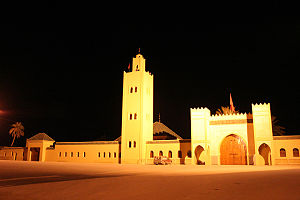

In [12]:
# images can also be promptly loaded with the process method, unique defined for each dataset
batches = pygestor.stream_dataset("wikimedia/wit_base", "data", ["train-00000-of-00330.parquet"], download_if_missing=True, batch_size=16)


data = pygestor.process_samples("wikimedia/wit_base", next(iter(batches)))
print(data.caption_attribution_description[1])
data.image[1]